# Détection et reconnaissance des panneaux de signalisation

**Objectif de l'étude**: construire un modèle IA pour la détection et la reconnaissance des panneaux 
de signalisation sur les images et sur la vidéo.

### Contexte du projet

Dans le monde de l'IA des grandes entreprises comme Tesla, Uber, Google, Mercedes-Benz, etc. travaillent sur des 
véhicules autonomes et des voitures autonomes. Pour atteindre la précision de cette technologie, les véhicules 
doivent être capables d'interpréter les panneaux de signalisation et de prendre des décisions en conséquence. 
Votre objectif est de construire un modèle qui permet de réaliser cette tâche.

Une interface graphique est demandée:

    * Qui permet de détecter dans une image les panneaux de signalisation et les reconnaitre (Afficher le label en Français).
    * Qui permet de détecter tous les panneaux dans une vidéo les reconnaitre et les afficher avec leurs labels.




## Description des fichiers

L'ensemble de données que nous allons utiliser pour former notre propre classificateur de panneaux de signalisation 
personnalisé est un ensemble de données qui comprend 43 classes de panneaux de signalisation et près de 50 000 
images.

Il existe plusieurs types de panneaux de signalisation tels que les limitations de vitesse, es feux de signalisation
, tourner à gauche ou à droite, pas de passage de véhicules lourds, etc. La classification des panneaux de 
signalisation est le processus d'identification de la classe à laquelle appartient un panneau de signalisation.

La définition de nos 43 classes de panneaux se trouve dans le répertoire "Meta" où figure nos 43 panneaux type.
le fichier Meta.csv reprend ces 43 images ainsi que toutes les caractéristiques individuelles des panneaux(image,
Numéro de classe, taille,couleur...).

Notre jeu de données est déjà fractionné en jeu d'apprentissage et de test.
Les images ainsi que leur caractéristiques propres figurent respectivement dans les fichiers Train.csv et Test.csv.
L'ensemble de données a un dossier train qui contient des images à l'intérieur de chaque classe et un dossier de test que nous utiliserons pour tester notre modèle.

Dans notre projet, nous allons créer un modèle de réseau neuronal profond qui peut classer les panneaux de 
signalisation présents dans l'image dans différentes catégories. Avec ce modèle, nous sommes capables de lire et 
de comprendre les panneaux de signalisation qui sont une tâche très importante pour tous les véhicules autonomes.



## Importation des librairies

In [1]:


import time
import numpy as np 
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
tf.random.set_seed(42)
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout




## Lecture des fichiers

In [2]:
input_path = 'C:/Users/utilisateur/Google Drive/microsoft_ia/panneaux de signalisation/'
data_train = pd.read_csv(input_path + 'Train.csv',header=None)
data_test = pd.read_csv(input_path + 'Test.csv',header=None)
data_meta = pd.read_csv(input_path + 'Meta.csv',header=0)

In [3]:
data_meta

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


# Traitement des données

On obtient le détail de nos 43 classes de panneaux de signalisation. Nous avons aucune indication concernant
le type de panneaux. il faudra par conséquent, dans un second temps, créer un dictionnaire qui va pour chacune de nos
classes de panneaux définir un label.

On va s'intéresser tout d'abord à notre jeu d'entraînemnt et afficher le nombre d'enregistrements dans chaque catégorie
de panneaux.

In [4]:
# Affichage du nombre d'enregistrements catégorie
data_train[data_train.columns[6]].value_counts()

2          2250
1          2220
13         2160
12         2100
38         2070
10         2010
4          1980
5          1860
25         1500
9          1470
7          1440
8          1410
3          1410
11         1320
18         1200
35         1200
17         1110
31          780
14          780
33          689
15          630
26          600
28          540
23          510
30          450
16          420
6           420
34          420
36          390
22          390
20          360
40          360
21          330
39          300
29          270
24          270
32          240
27          240
41          240
42          240
19          210
37          210
0           210
ClassId       1
Name: 6, dtype: int64

L'ensemble de données contient plus de 50 000 images de différents panneaux de signalisation. Il est en outre 
classé en 43 classes différentes. Le jeu de données est assez variable, certaines classes ont de nombreuses 
images tandis que certaines classes ont peu d'images.

Au vu de nos résultats, nous constatons que le tableau est classé par nombre d'occurrences et non par numéro de classes.
On va donc faire un trier les occurrences par classe.

In [5]:
sorted_series = data_train[6].value_counts().sort_index(ignore_index=True)
dt_label_count_array = sorted_series.to_numpy()
y = dt_label_count_array[0:43]
print(y)

[ 210 2220 2010 1320 2100 2160  780  630  420 1110 1200  210 2250  360
  330  390  510  270 1500  600  240  540  270 1410  450  780  240  689
  420 1200  390  210 2070  300 1980  360  240  240 1860  420 1440 1410
 1470]


### On va créer un dictionnaire de labels pour chacune de nos classes de panneaux de signalisations

In [6]:
#dictionnaire pour étiqueter toutes les classes de panneaux de signalisation.


#dictionary to label all traffic signs class.
x = ['limitation de vitesse (20km/h)','limitation de vitesse (30km/h)','limitation de vitesse (50km/h)','limitation de vitesse (60km/h)', 
            'limitation de vitesse (70km/h)', 
            'limitation de vitesse (80km/h)', 
            'Fin de limitation de vitesse (80km/h)', 
            'limitation de vitesse (100km/h)', 
            'limitation de vitesse (120km/h)', 
            'Dépassement Interdit', 
            'Aucun véhicule passant de plus de 3,5 tonnes', 
            'Priorité ponctuelle', 
            'Route prioritaire', 
            'Cedez le passage', 
            'Stop', 
            'Circulation interdite', 
            'Interdit aux véhicules de plus de 3t', 
            'Sens interdit', 
            'Autres dangers', 
            'Virage à gauche', 
            'Virage à droite', 
            'Succession de virages', 
            'Dos âne', 
            'Chaussée glissante', 
            'Chaussée rétrécie par la droite', 
            'Travaux', 
            'Feux tricolores', 
            'Passage piétons', 
            'Lieu fréquenté par les enfants', 
            'Passage de cyclistes', 
            'Attention neige ou glace',
            'Passage animaux sauvages', 
            'Fin de limitation de vitesse', 
            'Obligation de tourner à droite', 
            'Obligation de tourner à gauche', 
            'Obligation aller tout droit', 
            'Aller tout droit ou à droite', 
            'Aller tout droit ou à gauche', 
            'Rester à droite', 
            'Rester à gauche', 
            'Rond point obligatoire', 
            'Fin interdiction de dépasser', 
            'Fin interdiction de dépasser pour les véhicules de plus de 3,5 tonnes']





<ipython-input-7-a480562b8789>:13: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


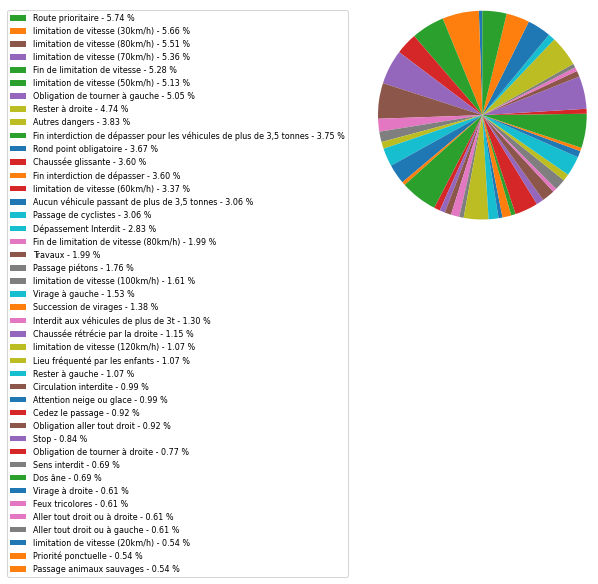

In [7]:


# colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')



On obtient une répartition en pourcentage de nos images de panneaux de signalisation.

In [8]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Notre dossier «train» contient 43 dossiers représentant chacun une classe différente. La plage du dossier va de 0
à 42. Avec l'aide du module OS, nous parcourons toutes les classes et ajoutons des images et leurs étiquettes respectives 
dans la liste des données et des étiquettes.



In [9]:
#Convertir des listes en tableaux numpy

data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


Nous avons stocké toutes les images et leurs étiquettes dans des listes (données et étiquettes).

On a convertit la liste en tableaux numpy pour alimenter le modèle.

La forme des données est (39209, 30, 30, 3), ce qui signifie qu'il y a 39 209 images de taille 30 × 30 pixels et 
3 signifie que les données contiennent des images en couleur.

Avec le package sklearn, nous utilisons la méthode train_test_split () pour fractionner les données d'entraînement
et de test.

À partir du package keras.utils, nous utilisons la méthode to_categorical pour convertir les étiquettes présentes
dans y_train et y_test en un encodage.


In [10]:
#Fractionnement du jeu de données d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Notre jeu de données comprend donc 31367 images couleurs 30 x 30 pixels contre 7842 images couleurs pour le 
jeu de test.

In [11]:
#Conversion des étiquettes en un seul encodage.

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Contruction du modèle CNN

Pour classer les images dans leurs catégories respectives, nous allons construire un modèle CNN (Convolutional Neural Network).
CNN est le meilleur à des fins de classification d'images.



L'architecture de notre modèle est:

    * 2 Couches Conv2D (filtre = 32, kernel_size = (5,5), activation = "relu")
    * Couche MaxPool2D (pool_size = (2,2)) (Méthode maxpooling)
    * Couche d'abandon (taux = 0,25)
    * 2 Calques Conv2D (filtre = 64, kernel_size = (3,3), activation = "relu") (on utilise 64 Kernels)
    * Couche MaxPool2D (pool_size = (2,2))
    * Couche d'abandon (taux = 0,25)
    * Aplatir le calque pour presser les calques en 1 dimension
    * Couche dense entièrement connectée (256 nœuds, activation = "relu")
    * Couche d'abandon (taux = 0,5)
    * Couche dense (43 nœuds, activation = "softmax") (fonction d'activation softmax pour une classification multiclasse)



On va compiler le modèle avec l'optimiseur Adam qui fonctionne bien et la perte est «categorical_crossentropy» 
car nous avons plusieurs classes à catégoriser.



In [12]:
#Construction du modèle

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation du modèle

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement et validation du modèle

Après avoir construit l'architecture du modèle, nous entraînons le modèle à l'aide de model.fit (). 
Notre modèle fonctionnait mieux avec la taille de lot 64 contre 32. 
Et après 15 épochs, la précision était stable.



In [13]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 150s 151ms/step - loss: 2.9737 - accuracy: 0.3210 - val_loss: 0.4633 - val_accuracy: 0.8845
Epoch 2/15
981/981 [==============================] - 132s 135ms/step - loss: 0.8003 - accuracy: 0.7628 - val_loss: 0.2375 - val_accuracy: 0.9408
Epoch 3/15
981/981 [==============================] - 143s 146ms/step - loss: 0.4986 - accuracy: 0.8499 - val_loss: 0.1221 - val_accuracy: 0.9625
Epoch 4/15
981/981 [==============================] - 131s 134ms/step - loss: 0.3780 - accuracy: 0.8896 - val_loss: 0.1000 - val_accuracy: 0.9722
Epoch 5/15
981/981 [==============================] - 131s 134ms/step - loss: 0.2993 - accuracy: 0.9149 - val_loss: 0.0735 - val_accuracy: 0.9778
Epoch 6/15
981/981 [==============================] - 132s 135ms/step - loss: 0.2823 - accuracy: 0.9197 - val_loss: 0.0682 - val_accuracy: 0.9806
Epoch 7/15
981/981 [==============================] - 128s 131ms/step - loss: 0.2577 - accuracy: 0.9302 - val_loss: 0.0692 -

Notre modèle a une précision de 94% sur l'ensemble de données d'entraînement. 
Avec matplotlib, nous traçons le graphique pour la précision et la perte.

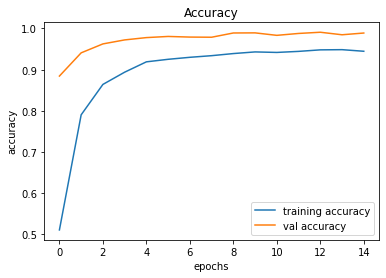

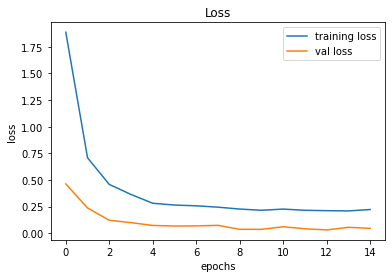

In [14]:
#Graphique de l'accuracy

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


# Validation du modèle sur le jeu de test

Notre ensemble de données contient un dossier de test et dans un fichier test.csv, nous avons les détails liés au
chemin de l'image et leurs étiquettes de classe respectives. Nous extrayons le chemin de l'image et les étiquettes
à l'aide de pandas. Ensuite, pour prédire le modèle, nous devons redimensionner nos images à 30 × 30 pixels et 
créer un tableau numpy contenant toutes les données d'image. À partir de sklearn.metrics, nous avons importé le 
precision_score et observé comment notre modèle prédisait les étiquettes réelles. Nous avons atteint une précision
de 95% dans ce modèle.


In [15]:
#prédiction sur l'ensemble de données de test

from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Calcul de la précision (Accuracy) sur le jeu de test
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))




C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.956769596199525


On va enregistrer le modèle que nous avons formé à l'aide de la fonction Keras model.save ().



In [16]:
model.save("traffic_classifier.h5")

**CONCLUSION**:
nous avons bien classé le classificateur des panneaux de signalisation avec une précision de 95% 
et avons également visualisé comment notre précision et notre perte changent avec le temps, ce qui est plutôt bon
à partir d'un simple modèle CNN.

# interface graphique détecteur de panneaux de signalisation

Nous allons maintenant créer une interface utilisateur graphique pour notre classificateur de panneaux de signalisation
avec Tkinter. On va Créer un nouveau fichier dans le dossier du projet et copiez le code ci-dessous.
Enregistrez-le sous gui.py et vous pouvez exécuter le code en tapant python gui.py dans la ligne de commande.

Dans ce fichier, nous avons d’abord chargé le modèle entraîné ‘traffic_classifier.h5’ en utilisant Keras. 
Et puis nous construisons l'interface graphique pour télécharger l'image et un bouton est utilisé pour classifier
qui appelle la fonction classify (). La fonction classify () convertit l'image en dimension de forme
(1, 30, 30, 3). En effet, pour prédire le panneau de signalisation, nous devons fournir la même dimension 
que nous avons utilisée lors de la construction du modèle. Ensuite, nous prédisons la classe,
le model.predict_classes (image) nous renvoie un nombre entre (0-42) qui représente la classe à laquelle 
il appartient. Nous utilisons le dictionnaire pour obtenir les informations sur la classe.
Voici le code du fichier gui.py.



In [17]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'limitation de vitesse (20km/h)',
            2:'limitation de vitesse (30km/h)', 
            3:'limitation de vitesse (50km/h)', 
            4:'limitation de vitesse (60km/h)', 
            5:'limitation de vitesse (70km/h)', 
            6:'limitation de vitesse (80km/h)', 
            7:'Fin de limitation de vitesse (80km/h)', 
            8:'limitation de vitesse (100km/h)', 
            9:'limitation de vitesse (120km/h)', 
            10:'Dépassement Interdit', 
            11:'Aucun véhicule passant de plus de 3,5 tonnes', 
            12:'Priorité ponctuelle', 
            13:'Route prioritaire', 
            14:'Cedez le passage', 
            15:'Stop', 
            16:'Circulation interdite', 
            17:'Interdit aux véhicules de plus de 3t', 
            18:'Sens interdit', 
            19:'Autres dangers', 
            20:'Virage à gauche', 
            21:'Virage à droite', 
            22:'Succession de virages', 
            23:'Dos âne', 
            24:'Chaussée glissante', 
            25:'Chaussée rétrécie par la droite', 
            26:'Travaux', 
            27:'Feux tricolores', 
            28:'Passage piétons', 
            29:'Lieu fréquenté par les enfants', 
            30:'Passage de cyclistes', 
            31:'Attention neige ou glace',
            32:'Passage animaux sauvages', 
            33:'Fin de limitation de vitesse', 
            34:'Obligation de tourner à droite', 
            35:'Obligation de tourner à gauche', 
            36:'Obligation aller tout droit', 
            37:'Aller tout droit ou à droite', 
            38:'Aller tout droit ou à gauche', 
            39:'Rester à droite', 
            40:'Rester à gauche', 
            41:'Rond point obligatoire', 
            42:'Fin interdiction de dépasser', 
            43:'Fin interdiction de dépasser pour les véhicules de plus de 3,5 tonnes' }


#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Autres dangers
limitation de vitesse (30km/h)


On a réussi à classifier le classificateur des panneaux de signalisation avec une précision de 95% et nous avons 
également visualisé comment notre précision et notre perte évoluent avec le temps, ce qui est plutôt bon à 
partir d'un simple modèle CNN.